# Possible Features Associated With Suicide Rates

## Explatory Data Analysis
### Contents
1. Introduction
2. General View of the Data
3. Data Cleaning
4. Exploring the Data
5. Feature Engineering
6. Results

### 1- Introduction
In this study, we examined suicide rates data between 1985 and 2016. What are the rates of suicide worldwide?
Could there be features that affect suicidal behavior? What can be these features, if any? The purpose of this study is to find answers to these questions in line with the data we have. For the purpose of the study, both the data of the world and the data of some countries were examined specially.

### 2- General View Of Data
#### Variables
- country: Name of the country.
- year: Year of the data.
- sex: Gender of the people.
- age: Age of the people.
- suicides_no: Number of suicides in that population.
- population: The total number of people in that trait.
- suicides/100k pop: One hundred thousand suicide rate
- country-year: Combnation of country and year columns.
- HDI for year: HDI data for one year(HDI: Human Developmant Index).
- gdp_for_year (\\$): GDP data for one year(GDP: Gross Domestic Product)
- gdp_per_capita (\\$): GDP data per capita(GDP: Gross Domestic Product)
- generation: Generation information of the age group

For more information about data visit this page https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

#### İmporting the useful libraries

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats.mstats import winsorize
from scipy.stats import stats
from scipy.stats import zscore
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="whitegrid")
title_font= {"family": "arial", "weight": "bold", "color": "darkred", "size": 13}
label_font= {"family": "arial", "weight": "bold", "color": "darkblue", "size": 10}


#### Viewing data

In [200]:
df= pd.read_csv("Desktop/master.csv")
df.head() # We only display the first five lines


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.710000,Albania1987,nan,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.190000,Albania1987,nan,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.830000,Albania1987,nan,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.590000,Albania1987,nan,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.280000,Albania1987,nan,"2,156,624,900",796,Boomers


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


The data consist 12 columns and 27820 lines. 
##### Categorical Variables
- country
- sex
- age
- country-year
- gdp_for_year (\\$\)
- generation
#### Continuous Variables
- year
- suicides_no
- population
- suicides/100k pop
- HDI for year
- gdp_per_capita (\\$\)


gdp_for_year column looks categorical. But it's contains numerical values. We will turn it into continuous in the later stages.

 

#### Making column names easy to use


In [202]:
df.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_rate', 'country-year', 'HDI_for_year',
       'gdp_for_year', 'gdp_per_capita', 'generation']
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_rate', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

#### Some statistically meaningful values about data

In [203]:
pd.options.display.float_format= "{:.6f}".format
df.describe()

,year,suicides_no,population,suicides/100k_rate,HDI_for_year,gdp_per_capita
count,27820.000000,27820.000000,27820.000000,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1844793.617398,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3911779.441756,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,278.000000,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,97498.500000,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,430150.000000,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1486143.250000,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,43805214.000000,224.970000,0.944000,126352.000000


### 3- Data Cleaning

Are there any missng data?

In [204]:
df.isnull().sum()*100/df.shape[0]

country               0.000000
year                  0.000000
sex                   0.000000
age                   0.000000
suicides_no           0.000000
population            0.000000
suicides/100k_rate    0.000000
country-year          0.000000
HDI_for_year         69.935298
gdp_for_year          0.000000
gdp_per_capita        0.000000
generation            0.000000
dtype: float64

There are only null values in HDI_for_year. No null values appear in other columns. When examining HDI_for_year we will drop the null values. So are there any incorrect value in year, sex, age, country and generation columns? Let's analyze this columns.



 


In [205]:
df.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k_rate     5298
country-year           2321
HDI_for_year            305
gdp_for_year           2321
gdp_per_capita         2233
generation                6
dtype: int64

In [206]:
columns_names = ["year", "sex", "age", "generation", "country"]
for col in columns_names:
    print("{} unique values:\n {}".format(col, df[col].unique()))

year unique values:
 [1987 1988 1989 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 1985 1986 1990 1991 2012 2013
 2014 2015 2011 2016]
sex unique values:
 ['male' 'female']
age unique values:
 ['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']
generation unique values:
 ['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']
country unique values:
 ['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'K

There are not incorrect value appears. But remember, gdp_for_year must be continuos. Let's try to make continuos gdp_for_year


In [207]:
df["gdp_for_year"].str.strip()

0         2,156,624,900
1         2,156,624,900
2         2,156,624,900
3         2,156,624,900
4         2,156,624,900
              ...      
27815    63,067,077,179
27816    63,067,077,179
27817    63,067,077,179
27818    63,067,077,179
27819    63,067,077,179
Name: gdp_for_year, Length: 27820, dtype: object

In [209]:
df["gdp_for_year"] = df["gdp_for_year"].replace(",", "", regex=True)
df["gdp_for_year"].head()

0    2156624900
1    2156624900
2    2156624900
3    2156624900
4    2156624900
Name: gdp_for_year, dtype: object

In [193]:
df["gdp_for_year"]= df["gdp_for_year"].astype("int64")

In [194]:
print("incorrect values for {}: ".format("gdp_for_year"))
for value in df["gdp_for_year"]:
    try:
        float(value)
    except:
        print(value)

incorrect values for gdp_for_year: 


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k_rate    27820 non-null float64
country-year          27820 non-null object
HDI_for_year          8364 non-null float64
gdp_for_year          27820 non-null int64
gdp_per_capita        27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


Great! As we see gdp_for_year has continuous.


#### Study of outliers

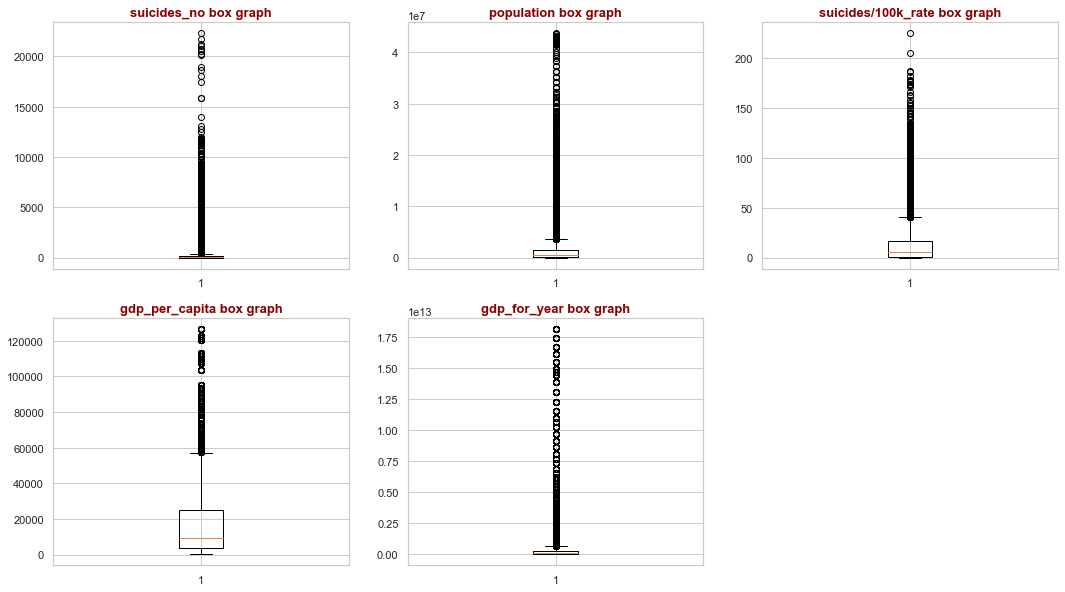

In [100]:
plt.figure(figsize=(18,10))
columns_name = ["suicides_no", "population","suicides/100k_rate", "gdp_per_capita", "gdp_for_year" ]
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[columns_name[i]])
    plt.title("{} box graph".format(columns_name[i]), fontdict= title_font)
    

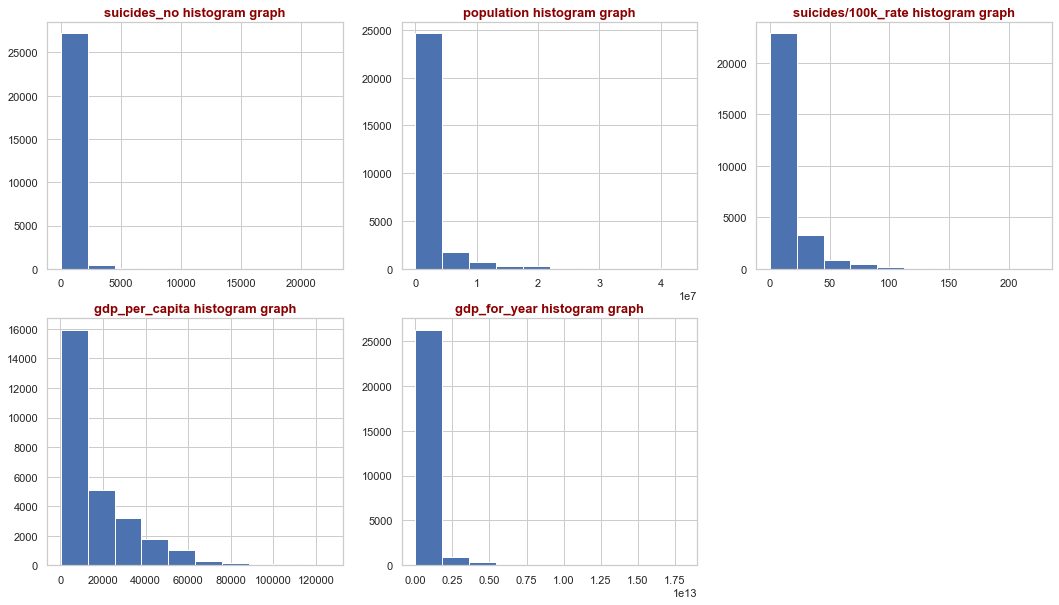

In [101]:
plt.figure(figsize=(18,10))
columns_name = ["suicides_no", "population","suicides/100k_rate", "gdp_per_capita", "gdp_for_year" ]
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.hist(df[columns_name[i]])
    plt.title("{} histogram graph".format(columns_name[i]), fontdict=title_font)
    
    

As we see there are appear outliers in five columns; suicides_no, population, suicides/100k_rate, gdp_per_capita, gdp_for_year.

#### We will review z score for suicides_no, population, suicides/100k_rate, gdp_per_capita, gdp_for_year.

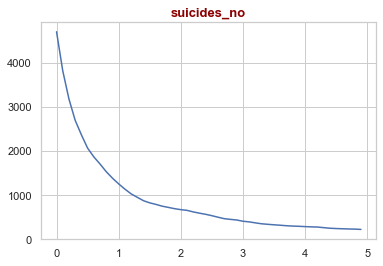

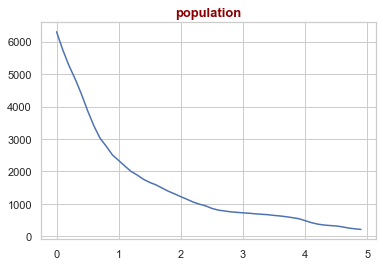

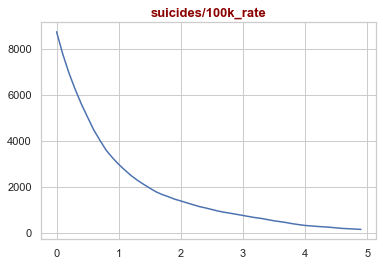

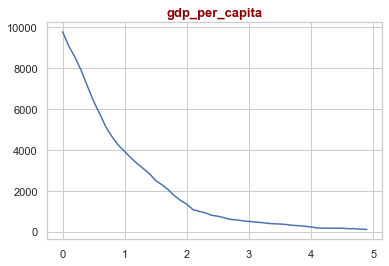

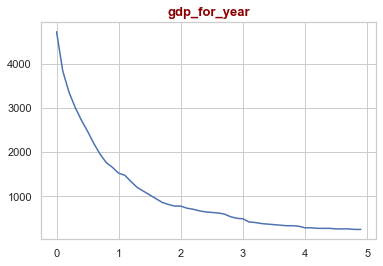

In [102]:
columns_name = ["suicides_no", "population","suicides/100k_rate", "gdp_per_capita", "gdp_for_year" ]
for names in range(0,5): 
    zscorelist = []
    zscores = zscore(df[columns_name[names]])
    for thereshold in np.arange(0,5,0.1):
        zscorelist.append((thereshold,len(np.where(zscores>thereshold)[0]))) 
        df_outliers= pd.DataFrame(zscorelist, columns=["thereshold", "outliers"])
    plt.plot(df_outliers.thereshold, df_outliers.outliers)
    plt.title(columns_name[names], fontdict=title_font)
    plt.show()
    

#### We will review with Tukey's Method.

In [103]:
columns_name = ["suicides_no", "population","suicides/100k_rate", "gdp_per_capita", "gdp_for_year" ]
for col in columns_name:
    q75, q25 = np.percentile(df[col], [75,25])
    caa = q75-q25
    comparison = pd.DataFrame(columns= [col, "thereshold", "outliers"])
    for thereshold in np.arange(1,5,0.5):
        min_value= q25- (caa*thereshold)
        max_value= q75+ (caa*thereshold)
        outliers= len(np.where((df[col]>max_value) | (df[col]<min_value))[0])
        comparison = comparison.append({col: col, "thereshold": thereshold,
                                             "outliers": outliers }, ignore_index=True)
    display(comparison)
    
        

,suicides_no,thereshold,outliers
0,suicides_no,1.000000,4519
1,suicides_no,1.500000,3909
2,suicides_no,2.000000,3402
3,suicides_no,2.500000,3048
4,suicides_no,3.000000,2692
5,suicides_no,3.500000,2451
6,suicides_no,4.000000,2227
7,suicides_no,4.500000,2039


,population,thereshold,outliers
0,population,1.000000,5004
1,population,1.500000,4180
2,population,2.000000,3315
3,population,2.500000,2783
4,population,3.000000,2390
5,population,3.500000,2077
6,population,4.000000,1846
7,population,4.500000,1655


,suicides/100k_rate,thereshold,outliers
0,suicides/100k_rate,1.000000,2914
1,suicides/100k_rate,1.500000,2046
2,suicides/100k_rate,2.000000,1506
3,suicides/100k_rate,2.500000,1164
4,suicides/100k_rate,3.000000,898
5,suicides/100k_rate,3.500000,701
6,suicides/100k_rate,4.000000,512
7,suicides/100k_rate,4.500000,340


,gdp_per_capita,thereshold,outliers
0,gdp_per_capita,1.000000,2378
1,gdp_per_capita,1.500000,1016
2,gdp_per_capita,2.000000,600
3,gdp_per_capita,2.500000,444
4,gdp_per_capita,3.000000,288
5,gdp_per_capita,3.500000,168
6,gdp_per_capita,4.000000,84
7,gdp_per_capita,4.500000,36


,gdp_for_year,thereshold,outliers
0,gdp_for_year,1.000000,4352
1,gdp_for_year,1.500000,3586
2,gdp_for_year,2.000000,3274
3,gdp_for_year,2.500000,3000
4,gdp_for_year,3.000000,2760
5,gdp_for_year,3.500000,2580
6,gdp_for_year,4.000000,2328
7,gdp_for_year,4.500000,2064


#### We will get rid of outliers by winsorization.


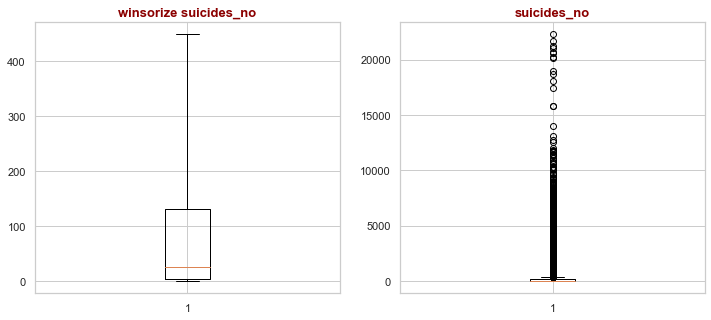

In [104]:
df["winsorize_suicides_no"] = winsorize(df["suicides_no"], (0, 0.11))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.boxplot(df["winsorize_suicides_no"], whis=2.5)
plt.title("winsorize suicides_no", fontdict=title_font)

plt.subplot(122)
plt.boxplot(df["suicides_no"])
plt.title("suicides_no", fontdict=title_font)
plt.show()

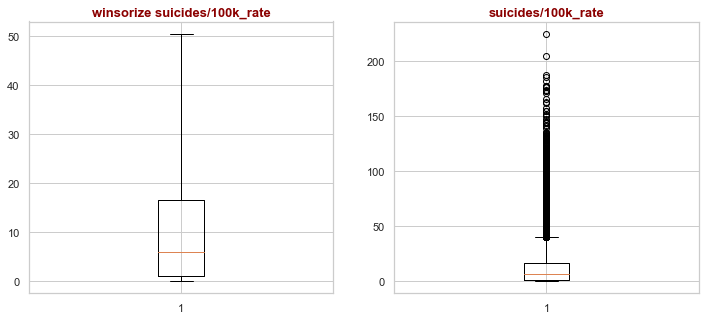

In [105]:
df["winsorize_suicides/100k_rate"] = winsorize(df["suicides/100k_rate"], (0,0.05))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.boxplot(df["winsorize_suicides/100k_rate"], whis=2.5)
plt.title("winsorize suicides/100k_rate", fontdict=title_font)

plt.subplot(122)
plt.boxplot(df["suicides/100k_rate"])
plt.title("suicides/100k_rate", fontdict=title_font)
plt.show()

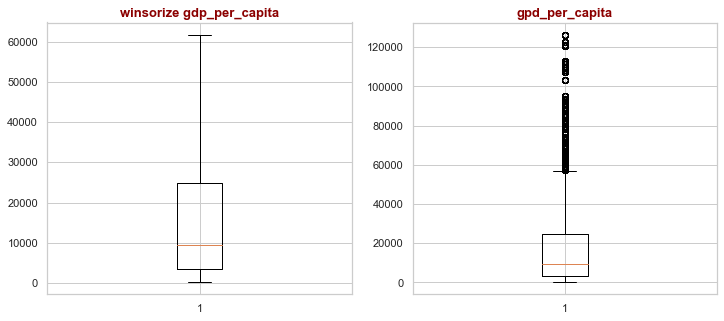

In [106]:
df["winsorize_gdp_per_capita"] = winsorize(df["gdp_per_capita"], (0, 0.03))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.boxplot(df["winsorize_gdp_per_capita"], whis=2.0)
plt.title("winsorize gdp_per_capita", fontdict=title_font)

plt.subplot(122)
plt.boxplot(df["gdp_per_capita"])
plt.title("gpd_per_capita", fontdict=title_font)
plt.show()

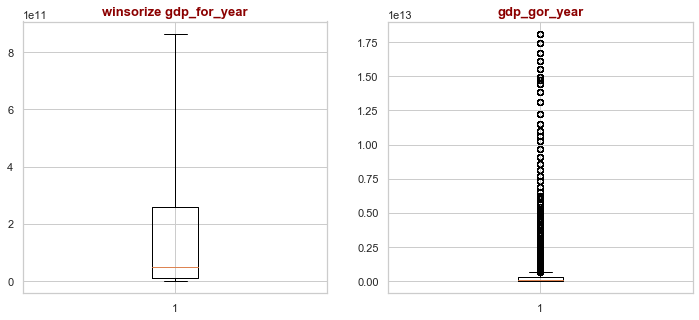

In [107]:
df["winsorize_gdp_for_year"] = winsorize(df["gdp_for_year"], (0, 0.11))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.boxplot(df["winsorize_gdp_for_year"], whis=2.5)
plt.title("winsorize gdp_for_year", fontdict=title_font)

plt.subplot(122)
plt.boxplot(df["gdp_for_year"])
plt.title("gdp_gor_year", fontdict=title_font)
plt.show()

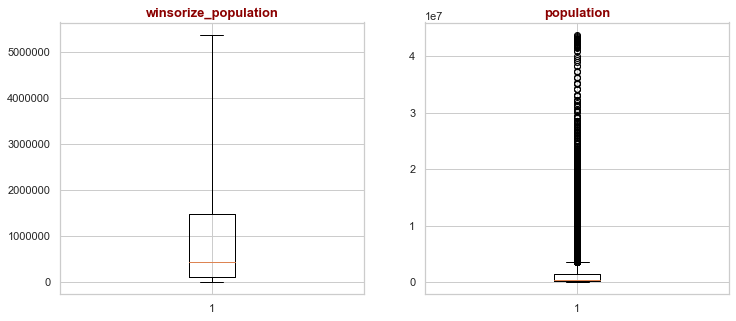

In [108]:
df["winsorize_population"]= winsorize(df["population"], (0,0.09))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.boxplot(df["winsorize_population"], whis=3.0)
plt.title("winsorize_population", fontdict=title_font)

plt.subplot(122)
plt.boxplot(df["population"])
plt.title("population", fontdict=title_font)
plt.show()

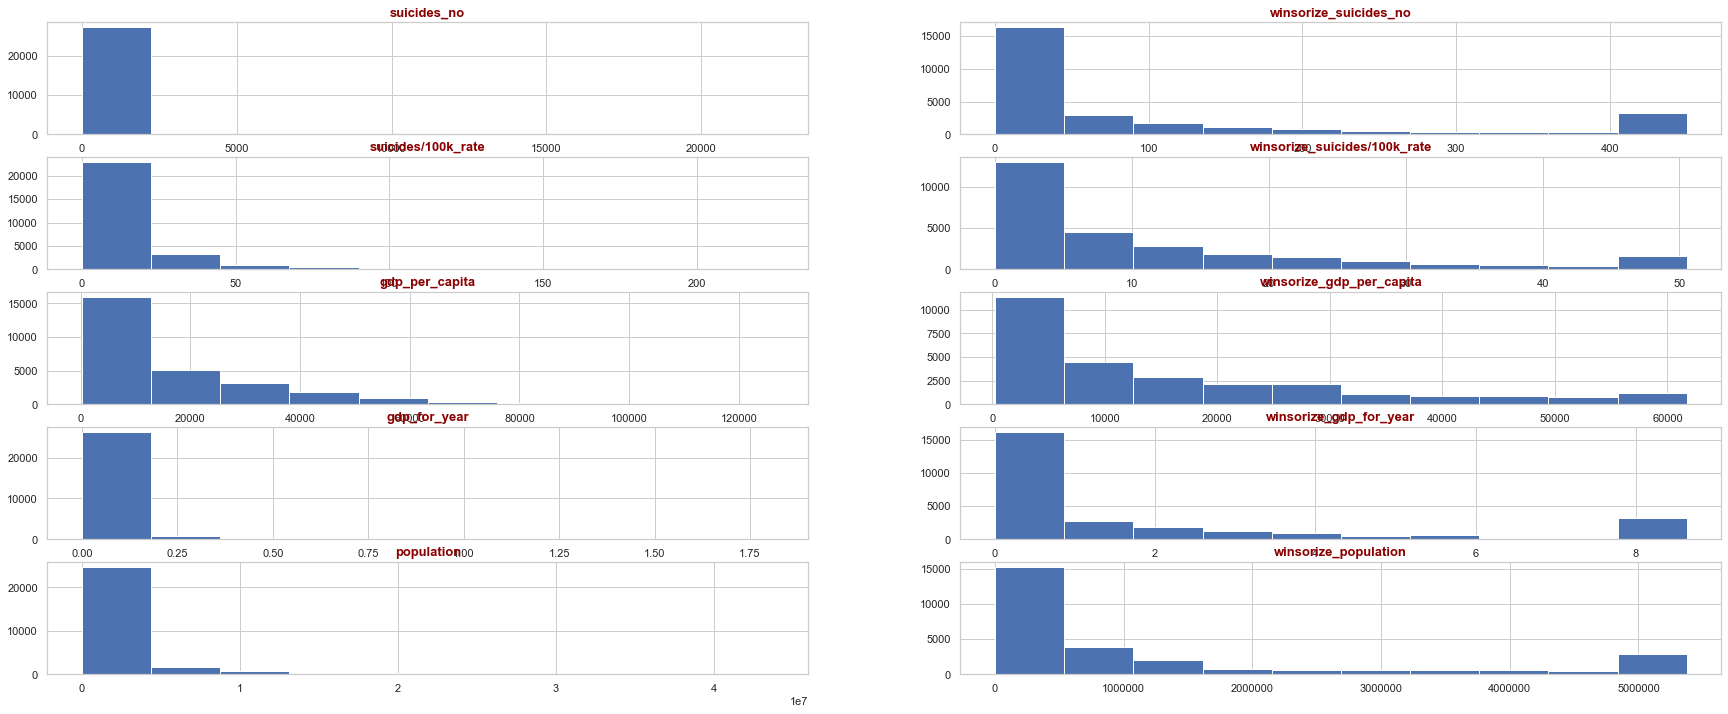

In [109]:
columns_name = ["suicides_no", "winsorize_suicides_no", "suicides/100k_rate", 
                "winsorize_suicides/100k_rate",  "gdp_per_capita",
                "winsorize_gdp_per_capita","gdp_for_year", "winsorize_gdp_for_year", "population", "winsorize_population" ]
plt.figure(figsize=(30,12))
for i in range(2):
    plt.subplot(5,2,i+1)
    plt.hist(df[columns_name[i]])
    plt.title(columns_name[i], fontdict=title_font)
for i in range(2):
    plt.subplot(5,2,i+3)
    plt.hist(df[columns_name[i+2]])
    plt.title(columns_name[i+2], fontdict=title_font)
for i in range(2):
    plt.subplot(5,2,i+5)
    plt.hist(df[columns_name[i+4]])
    plt.title(columns_name[i+4], fontdict=title_font)
for i in range(2):
    plt.subplot(5,2,i+7)
    plt.hist(df[columns_name[i+6]])
    plt.title(columns_name[i+6], fontdict=title_font)
for i in range(2):
    plt.subplot(5,2,i+9)
    plt.hist(df[columns_name[i+8]])
    plt.title(columns_name[i+8], fontdict=title_font)

plt.show()  
        
    

#### We should covert the data to logarithmic values for normalize the data.

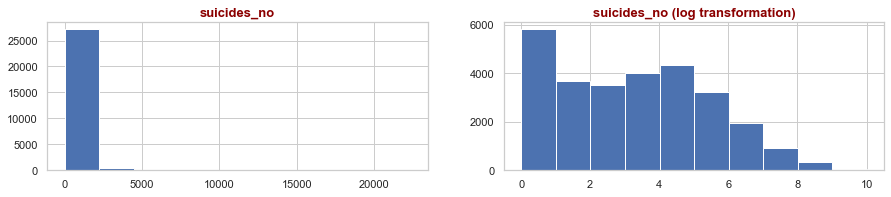

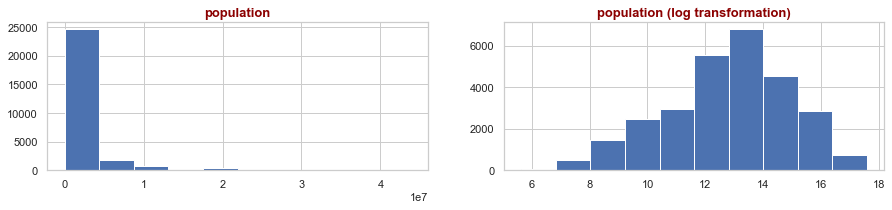

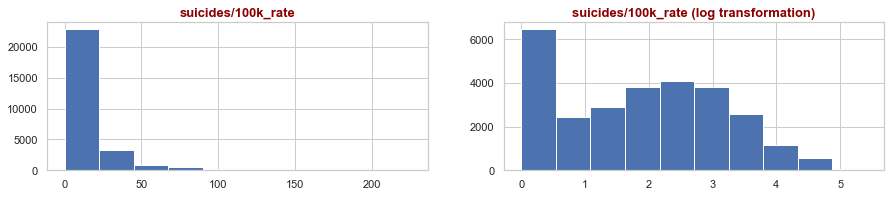

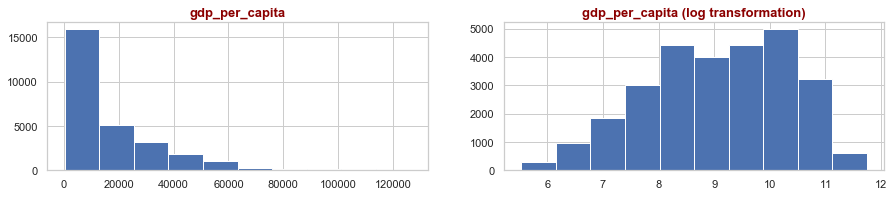

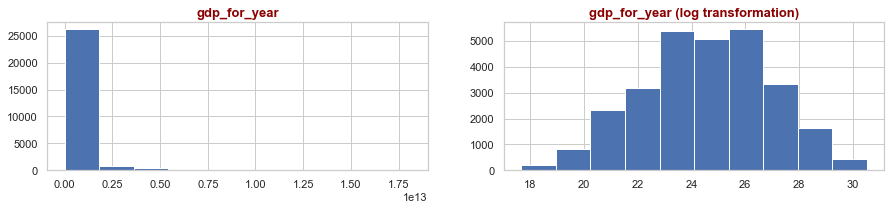

In [110]:
columns_name= ["suicides_no", "population", "suicides/100k_rate",
               "gdp_per_capita", "gdp_for_year"]
for name in columns_name:
    plt.figure(figsize=(15,6))
    plt.subplot(2,2,1)
    plt.hist(df[name])
    plt.title(name, fontdict=title_font)
        
    plt.subplot(2,2,2)
    plt.hist(np.log(df[name]+1))
    plt.title(name+ " (log transformation)", fontdict=title_font)
    plt.show()
    
        

As we see the data approximate to normal distribution with logarithmic transformation.

In [111]:
columns_name= ["suicides_no", "population", "suicides/100k_rate",
               "gdp_per_capita", "gdp_for_year"]
for name in columns_name:
    q75_log, q25_log = np.percentile(np.log(df[name]), [75,25])
    caa_log= q75_log-q25_log
    q75, q25 = np.percentile(df[name], [75,25])
    caa= q75-q25
    comparison = pd.DataFrame(columns= ["threshold", "outliers {}".format(name), "outliers_log"])
    for threshold in np.arange(1,5,0.5):
        max_value_log = q75_log+ (caa_log*threshold)
        min_value_log = q25_log- (caa_log*threshold)
        max_value = q75+ (caa*threshold)
        min_value = q25- (caa*threshold)
        outliers_log = len((np.where((np.log(df[name]+1)>max_value_log) | 
                               (np.log(df[name]+1)<min_value_log))[0]))
        outliers = len((np.where((df[name]>max_value) | 
                     (df[name]<min_value))[0]))
        comparison = comparison.append({"threshold": threshold, "outliers {}".format(name): outliers,
                              "outliers_log": outliers_log}, ignore_index=True)
    display(comparison)   
    



,threshold,outliers suicides_no,outliers_log
0,1.000000,4519.000000,161.000000
1,1.500000,3909.000000,0.000000
2,2.000000,3402.000000,0.000000
3,2.500000,3048.000000,0.000000
4,3.000000,2692.000000,0.000000
5,3.500000,2451.000000,0.000000
6,4.000000,2227.000000,0.000000
7,4.500000,2039.000000,0.000000


,threshold,outliers population,outliers_log
0,1.000000,5004.000000,1258.000000
1,1.500000,4180.000000,252.000000
2,2.000000,3315.000000,11.000000
3,2.500000,2783.000000,0.000000
4,3.000000,2390.000000,0.000000
5,3.500000,2077.000000,0.000000
6,4.000000,1846.000000,0.000000
7,4.500000,1655.000000,0.000000


,threshold,outliers suicides/100k_rate,outliers_log
0,1.000000,2914.000000,0.000000
1,1.500000,2046.000000,0.000000
2,2.000000,1506.000000,0.000000
3,2.500000,1164.000000,0.000000
4,3.000000,898.000000,0.000000
5,3.500000,701.000000,0.000000
6,4.000000,512.000000,0.000000
7,4.500000,340.000000,0.000000


,threshold,outliers gdp_per_capita,outliers_log
0,1.000000,2378.000000,288.000000
1,1.500000,1016.000000,0.000000
2,2.000000,600.000000,0.000000
3,2.500000,444.000000,0.000000
4,3.000000,288.000000,0.000000
5,3.500000,168.000000,0.000000
6,4.000000,84.000000,0.000000
7,4.500000,36.000000,0.000000


,threshold,outliers gdp_for_year,outliers_log
0,1.000000,4352.000000,660.000000
1,1.500000,3586.000000,60.000000
2,2.000000,3274.000000,0.000000
3,2.500000,3000.000000,0.000000
4,3.000000,2760.000000,0.000000
5,3.500000,2580.000000,0.000000
6,4.000000,2328.000000,0.000000
7,4.500000,2064.000000,0.000000


The outliers also decreased with logarithmic transformation.

### 4- Exploring The Data
We will examine some features of the relationship with suicide rates.

### 4.1- Let's study on the relationship between the economic situation and suicide rates. We will categorize the economic situation as very low, low, medium, high and very high. 


We will create a new dataset and study on it.


In [172]:
df1 = pd.DataFrame(df.groupby("country").mean()["winsorize_gdp_per_capita"])
df2= pd.DataFrame(df.groupby("country").mean()["winsorize_suicides/100k_rate"])
df1["winsorize_suicides/100k_rate"]= df2["winsorize_suicides/100k_rate"]
df1.head()

,winsorize_gdp_per_capita,winsorize_suicides/100k_rate
country,,
Albania,1859.045455,3.502879
Antigua and Barbuda,10448.185185,0.552901
Argentina,7914.096774,10.371290
Armenia,1873.919463,3.275872
Aruba,24221.642857,7.208452


We will categorize the economic situation as very low, low, medium, high and very high.

In [173]:
def economy_convert(value):
    if value<5000:
        return "very low"
    elif value<10000:
        return "low"
    elif value<20000:
        return "medium"
    elif value<30000:
        return "high"
    else:
        return "very high"


In [174]:
df1["category"]= df1.winsorize_gdp_per_capita.apply(economy_convert)
df1

,winsorize_gdp_per_capita,winsorize_suicides/100k_rate,category
country,,,
Albania,1859.045455,3.502879,very low
Antigua and Barbuda,10448.185185,0.552901,medium
Argentina,7914.096774,10.371290,low
Armenia,1873.919463,3.275872,very low
Aruba,24221.642857,7.208452,high
...,...,...,...
United Arab Emirates,42162.000000,1.317917,very high
United Kingdom,31908.354839,7.502473,very high
United States,39269.612903,13.699677,very high


In [175]:
df1.groupby("category").mean()["winsorize_suicides/100k_rate"]

category
high         6.103520
low         11.553522
medium      10.561052
very high   13.238113
very low     9.919247
Name: winsorize_suicides/100k_rate, dtype: float64

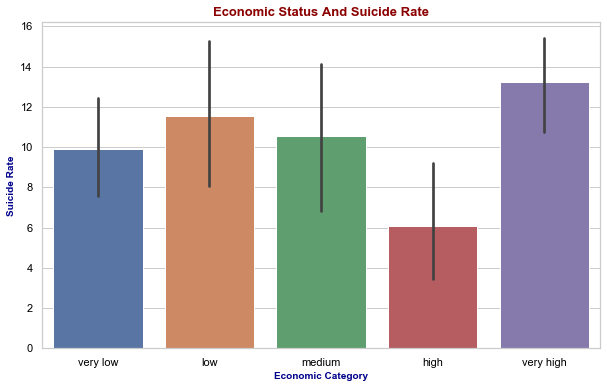

In [176]:
plt.figure(figsize=(10,6))
sns.barplot(df1["category"], df1["winsorize_suicides/100k_rate"], order= ["very low", "low", "medium", "high", "very high"])
plt.title("Economic Status And Suicide Rate", fontdict=title_font)
plt.xlabel("Economic Category", fontdict=label_font)
plt.ylabel("Suicide Rate", fontdict=label_font)
plt.xticks(color= "black")
plt.yticks(color= "black")
plt.show()


Ttest for economic categories.

In [117]:
kategoriler = df1["category"].unique()
pd.options.display.float_format= "{:.6f}".format
karsilastirma = pd.DataFrame(columns= ["category_1", "category_2", "statistics", "p_value"])
for i in range(0,len(kategoriler)):
    for j in range(i+1, len(kategoriler)):
        ttest= stats.ttest_ind(df1[df1["category"]==kategoriler[i]]["winsorize_suicides/100k_rate"],
                               df1[df1["category"]==kategoriler[j]]["winsorize_suicides/100k_rate"])
        category_1 = kategoriler[i]
        category_2 = kategoriler[j]
        statistics = ttest[0]
        p_value = ttest[1]
        karsilastirma = karsilastirma.append({"category_1": category_1, "category_2": category_2,
                                              "statistics": statistics, "p_value": p_value}, ignore_index=True)
        
display(karsilastirma)   

,category_1,category_2,statistics,p_value
0,very low,medium,-0.283071,0.778365
1,very low,low,-0.726901,0.470547
2,very low,high,1.461378,0.151724
3,very low,very high,-1.784132,0.080127
4,medium,low,-0.355442,0.724392
5,medium,high,1.596163,0.124102
6,medium,very high,-1.251571,0.218798
7,low,high,1.704722,0.099320
8,low,very high,-0.737971,0.464735
9,high,very high,-3.329255,0.002380


There is only significance between the high and very high.


### 4.2- Do suicide numbers differ significantly between age groups?

We will create a new dataset for on study on it.

In [150]:
df1 = pd.DataFrame(df.groupby("age").sum()["winsorize_suicides_no"]).reset_index()
df1.groupby("age").sum()["winsorize_suicides_no"]
df1

,age,winsorize_suicides_no
0,15-24 years,474877
1,25-34 years,531229
2,35-54 years,769786
3,5-14 years,52264
4,55-74 years,648305
5,75+ years,379163


In [151]:
orderlist= ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]

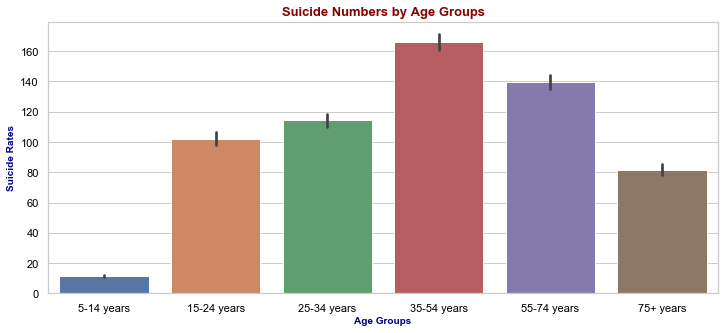

In [156]:
plt.figure(figsize=(12,5))
sns.barplot(df["age"], df["winsorize_suicides_no"], order=orderlist)
plt.title("Suicide Numbers by Age Groups", fontdict=title_font)
plt.xlabel("Age Groups", fontdict=label_font)
plt.ylabel("Suicide Rates",  fontdict=label_font)
plt.xticks(color= "black")
plt.yticks(color= "black")
plt.show()  

#### Test for Age Groups

In [153]:
yaslar = df1["age"].unique()
karsilastirma = pd.DataFrame(columns= ["group_1", "group_2", "statistics", "p_value"])
pd.options.display.float_format= "{:.6f}".format
for i in range(0,len(yaslar)):
    for j in range(i+1,len(yaslar)):
        ttest = stats.ttest_ind(df[df["age"]==yaslar[i]]["winsorize_suicides_no"],
                                df[df["age"]==yaslar[j]]["winsorize_suicides_no"])
        group_1 = yaslar[i]
        group_2 = yaslar[j]
        statistics = ttest[0]
        p_value = ttest[1]
        karsilastirma = karsilastirma.append({"group_1": group_1, "group_2": group_2,
                                              "statistics": statistics, "p_value": p_value}, ignore_index=True)
display(karsilastirma)

,group_1,group_2,statistics,p_value
0,15-24 years,25-34 years,-3.946522,0.000080
1,15-24 years,35-54 years,-19.024309,0.000000
2,15-24 years,5-14 years,41.877939,0.000000
3,15-24 years,55-74 years,-11.616821,0.000000
4,15-24 years,75+ years,7.196000,0.000000
5,25-34 years,35-54 years,-15.055483,0.000000
6,25-34 years,5-14 years,45.121686,0.000000
7,25-34 years,55-74 years,-7.659328,0.000000
8,25-34 years,75+ years,11.099879,0.000000
9,35-54 years,5-14 years,58.717493,0.000000


### 4.3- What are the distributions of age group by gender?


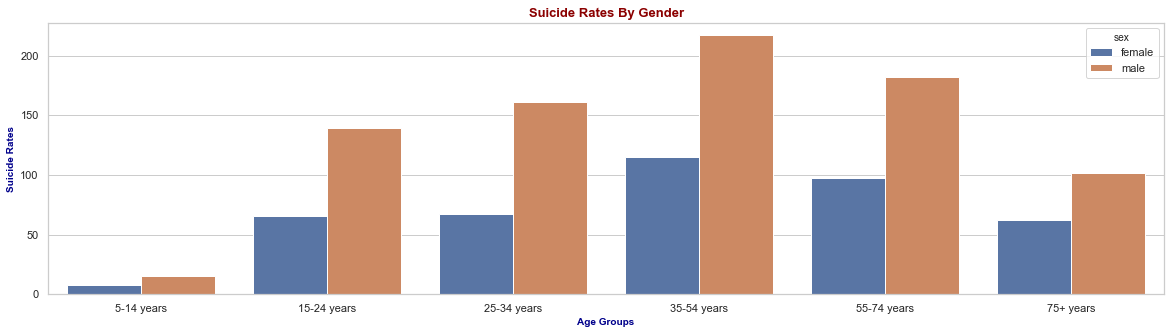

In [159]:
df1= df.groupby(["sex", "age"]).mean()["winsorize_suicides_no"].reset_index()


plt.figure(figsize=(20,5))
sns.barplot(data=df1, x= df1["age"], y=df1["winsorize_suicides_no"], hue=df1["sex"], order=orderlist)
plt.title("Suicide Rates By Gender", fontdict=title_font)
plt.xlabel("Age Groups", fontdict=label_font)
plt.ylabel("Suicide Rates", fontdict=label_font)

plt.show()  


As we see the rate of men is higher than that of women for all age groups.


### 4.4- What are the distribution of suicide rates by years and gender

In [160]:
df1 = pd.DataFrame()
df1["year"]= df["year"].astype("object")
df1["sex"]= df["sex"]
df1["winsorize_suicides/100k_rate"]= df["winsorize_suicides/100k_rate"]
df1.head()

,year,sex,winsorize_suicides/100k_rate
0,1987,male,6.710000
1,1987,male,5.190000
2,1987,female,4.830000
3,1987,male,4.590000
4,1987,male,3.280000


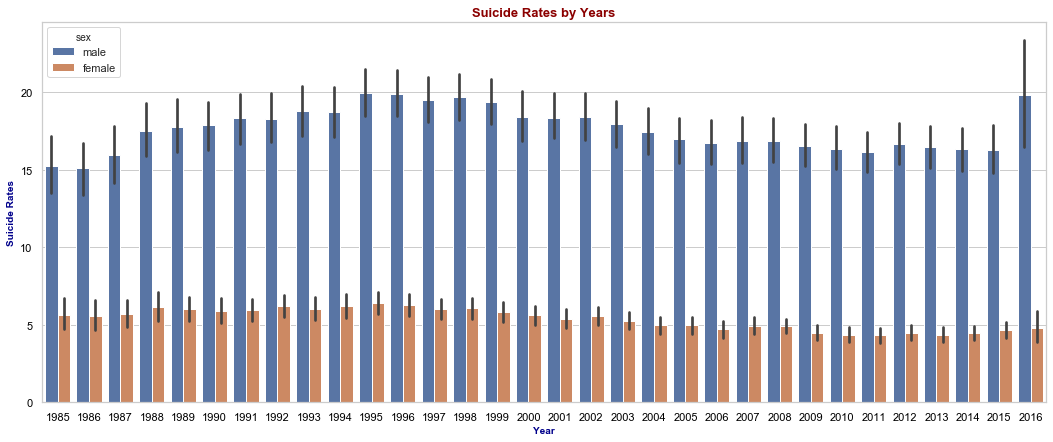

In [161]:
plt.figure(figsize=(18,7))
sns.barplot(data=df1, x="year", y="winsorize_suicides/100k_rate", hue="sex")
plt.title("Suicide Rates by Years", fontdict=title_font)
plt.xlabel("Year", fontdict=label_font)
plt.ylabel("Suicide Rates", fontdict=label_font)
plt.xticks(color= "black")
plt.yticks(color= "black")
plt.show() 

Ttest for year

In [163]:
yıllar = df["year"].unique()
karsilastirma = pd.DataFrame(columns= ["grup_1", "grup_2", "istatistik", "p_degeri"])
pd.options.display.float_format= "{:.6f}".format
for i in range(0,len(yıllar)):
    for j in range(i+1,len(yıllar)):
        ttest= stats.ttest_ind(df[df["year"]==yıllar[i]]["winsorize_suicides/100k_rate"],
                               df[df["year"]==yıllar[j]]["winsorize_suicides/100k_rate"])
        grup_1= yıllar[i]
        grup_2= yıllar[j]
        istatistik= ttest[0]
        p_degeri= ttest[1]
        karsilastirma= karsilastirma.append({"grup_1": grup_1, "grup_2": grup_2,
                                            "istatistik": istatistik, "p_degeri": p_degeri}, ignore_index=True)
display(karsilastirma[karsilastirma["p_degeri"]<0.005])

,grup_1,grup_2,istatistik,p_degeri
5,1987.000000,1995.000000,-3.162337,0.001595
6,1987.000000,1996.000000,-3.056843,0.002275
107,1992.000000,2010.000000,2.968879,0.003028
113,1992.000000,2013.000000,2.851277,0.004406
114,1992.000000,2014.000000,2.863393,0.004242
...,...,...,...,...
283,1999.000000,2015.000000,3.217306,0.001318
284,1999.000000,2011.000000,3.830717,0.000132
304,2000.000000,2011.000000,2.869101,0.004158
341,2002.000000,2011.000000,2.889524,0.003899


### 4.5- Are there any relation between HDI(Human Development Index) and suicide rates?

In [43]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k_rate,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation,winsorize_suicides_no,winsorize_suicides/100k_rate,winsorize_gdp_per_capita,winsorize_gdp_for_year,winsorize_population
0,Albania,1987,male,15-24 years,21,312900,6.710000,Albania1987,nan,2156624900,796,Generation X,21,6.710000,796,2156624900,312900
1,Albania,1987,male,35-54 years,16,308000,5.190000,Albania1987,nan,2156624900,796,Silent,16,5.190000,796,2156624900,308000
2,Albania,1987,female,15-24 years,14,289700,4.830000,Albania1987,nan,2156624900,796,Generation X,14,4.830000,796,2156624900,289700
3,Albania,1987,male,75+ years,1,21800,4.590000,Albania1987,nan,2156624900,796,G.I. Generation,1,4.590000,796,2156624900,21800
4,Albania,1987,male,25-34 years,9,274300,3.280000,Albania1987,nan,2156624900,796,Boomers,9,3.280000,796,2156624900,274300


All countries have no HDI data. That's why we will only study with countries that have HDI data.

In [44]:
df.dropna()
df1 = pd.DataFrame(df.groupby("country").mean()["HDI_for_year"])
df1["winsorize_suicides/100k_rate"]= df.groupby("country").mean()["winsorize_suicides/100k_rate"]
df1 = df1.dropna()
df1.head()

,HDI_for_year,winsorize_suicides/100k_rate
country,,
Albania,0.673000,3.502879
Antigua and Barbuda,0.781667,0.552901
Argentina,0.779600,10.371290
Armenia,0.690125,3.275872
Australia,0.912750,12.992806


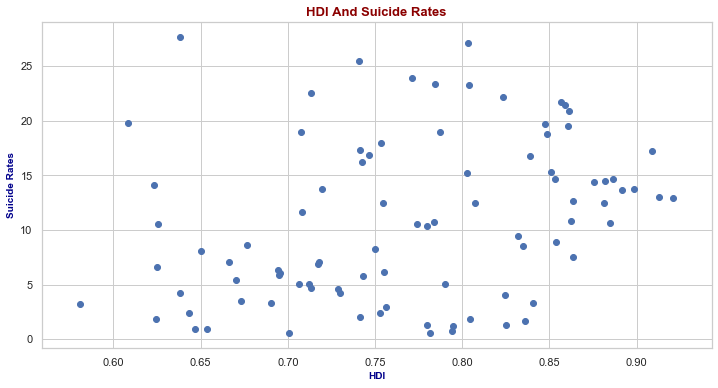

In [45]:
plt.figure(figsize=(12,6))
plt.scatter(df1["HDI_for_year"], df1["winsorize_suicides/100k_rate"])
plt.title("HDI And Suicide Rates", fontdict=title_font)
plt.xlabel("HDI", fontdict=label_font)
plt.ylabel("Suicide Rates", fontdict=label_font)
plt.show()  

There is no appears meaningful relationship. We will calculate the correlation between HDI and suicide rates by using the "corr()" method. 

In [46]:
df1.corr() 

,HDI_for_year,winsorize_suicides/100k_rate
HDI_for_year,1.000000,0.300291
winsorize_suicides/100k_rate,0.300291,1.000000


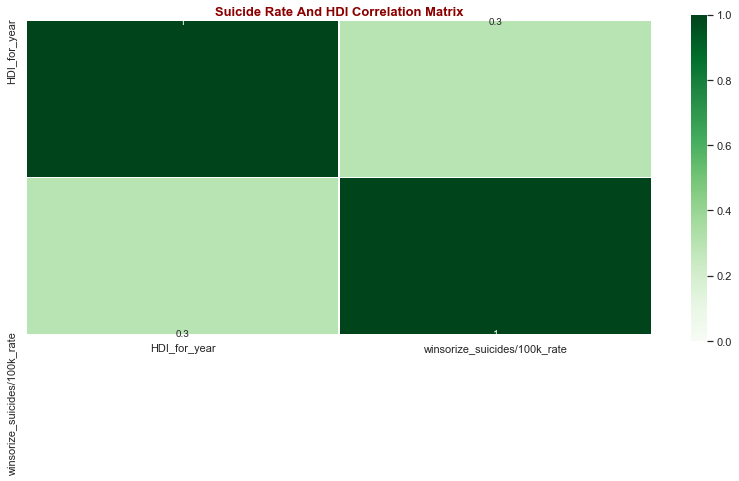

In [47]:
korelasyon_matrisi_df1= df1.corr()
plt.figure(figsize=(14,6))
sns.heatmap(korelasyon_matrisi_df1, square=True, annot=True, linewidth=.5, vmin=0, vmax=1, cmap="Greens")
plt.title("Suicide Rate And HDI Correlation Matrix", fontdict=title_font)
plt.show()

Again, the relationship does not seem meaningful.

### 4.6- Study of sucide rates by specific countries.

In [79]:
df = df.dropna()
df2 = df[(df["country"]=="Brazil") | (df["country"]=="Mexico") |(df["country"]=="Turkey")] #Developing Countries
df2_ = pd.DataFrame(df2.groupby([df2["country"], df2["year"]]).mean()["winsorize_suicides/100k_rate"]).reset_index()
df3 = df[(df["country"]=="Argentina") | (df["country"]=="Chile") | (df["country"]=="Ecuador")] #South America
df3_ = pd.DataFrame(df3.groupby([df3["country"], df3["year"]]).mean()["winsorize_suicides/100k_rate"]).reset_index()
df4 = df[(df["country"]=="Belgium") | (df["country"]=="France") | (df["country"]=="Germany")] #Strong Economic Europe
df4_ = pd.DataFrame(df4.groupby([df4["country"], df4["year"]]).mean()["winsorize_suicides/100k_rate"]).reset_index()
df5 = df[(df["country"]=="Norway") | (df["country"]=="Finland") | (df["country"]=="Denmark")] #North Europe
df5_ = pd.DataFrame(df5.groupby([df5["country"], df5["year"]]).mean()["winsorize_suicides/100k_rate"]).reset_index()
df6 = df[(df["country"]=="Serbia") | (df["country"]=="Ukraine") |(df["country"]=="Bulgaria")] #East Europe
df6_ = pd.DataFrame(df6.groupby([df6["country"], df6["year"]]).mean()["winsorize_suicides/100k_rate"]).reset_index()
df7 = df[(df["country"]=="United States") | (df["country"]=="United Kingdom") |(df["country"]=="Japan")] #Countries with advanced technology
df7_ = pd.DataFrame(df7.groupby([df7["country"], df7["year"]]).mean()["winsorize_suicides/100k_rate"]).reset_index()

plt.figure(figsize=(20,6))
fig = px.line(df2_, x="year", y="winsorize_suicides/100k_rate", color="country")
fig.show()

plt.figure(figsize=(20,6))
fig= px.line(df3_, x="year", y="winsorize_suicides/100k_rate", color="country")
fig.show()

plt.figure(figsize=(20,6))
fig= px.line(df4_, x="year", y="winsorize_suicides/100k_rate", color="country")
fig.show()

plt.figure(figsize=(20,6))
fig= px.line(df5_, x="year", y="winsorize_suicides/100k_rate", color="country")
fig.show()

plt.figure(figsize=(20,6))
fig= px.line(df6_, x="year", y="winsorize_suicides/100k_rate", color="country")
fig.show()

plt.figure(figsize=(20,6))
fig= px.line(df7_, x="year", y="winsorize_suicides/100k_rate", color="country")
fig.show()




<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

### 5- Feature Engineering  

#### 5.1- We can use Jarque-Bera and Normal Tests to see if the columns follow the normal distribution. 

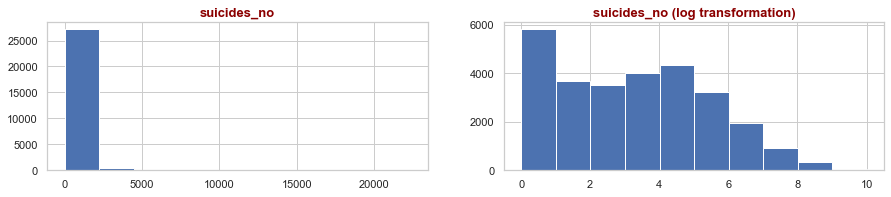

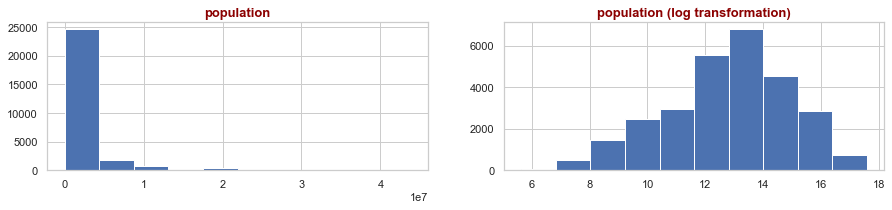

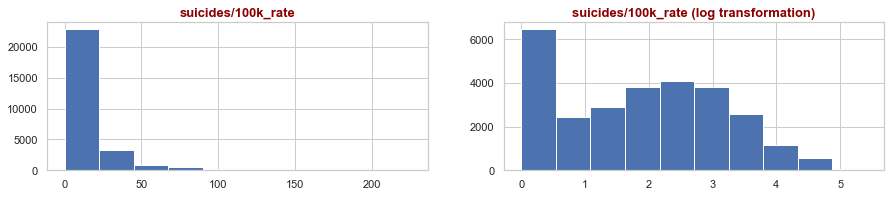

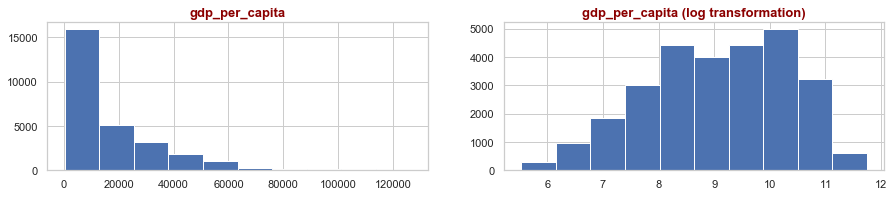

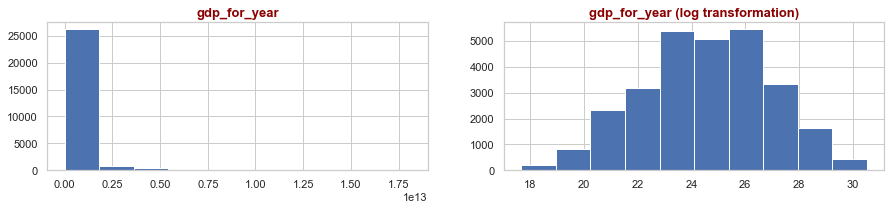

In [171]:
columns_name= ["suicides_no", "population", "suicides/100k_rate",
               "gdp_per_capita", "gdp_for_year"]
for name in columns_name:
    plt.figure(figsize=(15,6))
    plt.subplot(2,2,1)
    plt.hist(df[name])
    plt.title(name, fontdict=title_font)
        
    plt.subplot(2,2,2)
    plt.hist(np.log(df[name]+1))
    plt.title(name+ " (log transformation)", fontdict=title_font)
    plt.show()
    

The distribution of our features looks like this. Let's use Jarque-Bera and Normal Tests for if check the columns follow the normal distribution.

In [139]:
columns_name = ["suicides_no", "suicides/100k_rate", "population", "gdp_per_capita", "gdp_for_year"]
pd.options.display.float_format = "{:.5f}".format

distribution_test = pd.DataFrame(columns= ["attribute", "jarque_bera_stats", "jarque_bera_p_value",
                                           "normaltest_stats", "normaltest_p_value"])
for names in columns_name:
    jb_stats= jarque_bera(np.log(df[names]+1))
    normal_stats= normaltest(np.log(df[names]+1))
    distribution_test= distribution_test.append({"attribute": names, 
                                                 "jarque_bera_stats": jb_stats[0], "jarque_bera_p_value": jb_stats[1],
                                                  "normaltest_stats": normal_stats[0], "normaltest_p_value": normal_stats[1]},
                                                ignore_index=True)
display(distribution_test)



,attribute,jarque_bera_stats,jarque_bera_p_value,normaltest_stats,normaltest_p_value
0,suicides_no,994.78448,0.00000,3010.64676,0.00000
1,suicides/100k_rate,1272.15906,0.00000,7908.36448,0.00000
2,population,857.95981,0.00000,806.88239,0.00000
3,gdp_per_capita,951.62603,0.00000,1923.79070,0.00000
4,gdp_for_year,307.55311,0.00000,454.12964,0.00000


If the p-value is 0.00, this shows that variables have not normal distribution.

####  5.2- Normalization And Standardization

We will use normalization and standardization because some machine learning models assume that all properties have the same range of values.

Normalization: Rescaling a variable to the interval [0,1]


Standardization: A variable is rescaled to a mean of 0 and its standard deviation of 1.



In [52]:
#normalization:
df["norm_winsorize_suicides_no"]= normalize(np.array(df["winsorize_suicides_no"]).reshape(-1,1)).reshape(-1,1)
df["norm_winsorize_suicides/100k_rate"]= normalize(np.array(df["winsorize_suicides/100k_rate"]).reshape(-1,1)).reshape(-1,1)
df["norm_winsorize_gdp_per_capita"]= normalize(np.array(df["winsorize_gdp_per_capita"]).reshape(-1,1)).reshape(-1,1)
df["norm_winsorize_gdp_for_year"]= normalize(np.array(df["winsorize_gdp_for_year"]).reshape(-1,1)).reshape(-1,1)
df["norm_winsorize_population"]= normalize(np.array(df["winsorize_population"]).reshape(-1,1)).reshape(-1,1)

norm_features= ["winsorize_suicides_no", "norm_winsorize_suicides_no",
                "winsorize_suicides/100k_rate", "norm_winsorize_suicides/100k_rate",
                "winsorize_gdp_per_capita", "norm_winsorize_gdp_per_capita",
                "winsorize_gdp_for_year", "norm_winsorize_gdp_for_year",
                "winsorize_population", "norm_winsorize_population"]
print("---Minimum Values---\n ")
print(df[norm_features].min())
print("---Maximum Values---\n ")
print(df[norm_features].max())

---Minimum Values---
 
winsorize_suicides_no                       0.00000
norm_winsorize_suicides_no                  0.00000
winsorize_suicides/100k_rate                0.00000
norm_winsorize_suicides/100k_rate           0.00000
winsorize_gdp_per_capita                  313.00000
norm_winsorize_gdp_per_capita               1.00000
winsorize_gdp_for_year              396270000.00000
norm_winsorize_gdp_for_year                 1.00000
winsorize_population                      875.00000
norm_winsorize_population                   1.00000
dtype: float64
---Maximum Values---
 
winsorize_suicides_no                        450.00000
norm_winsorize_suicides_no                     1.00000
winsorize_suicides/100k_rate                  50.53000
norm_winsorize_suicides/100k_rate              1.00000
winsorize_gdp_per_capita                   61711.00000
norm_winsorize_gdp_per_capita                  1.00000
winsorize_gdp_for_year              863723411633.00000
norm_winsorize_gdp_for_year       

As we see, minimum value of normalized values is 0.00 and maximum value of normalized values is 1.00.

In [53]:
# standardization
df["scale_suicides_no"]= scale(df["winsorize_suicides_no"])
df["scale_suicides/100k_rate"]= scale(df["winsorize_suicides/100k_rate"])
df["scale_gdp_per_capita"]= scale(df["winsorize_gdp_per_capita"])
df["scale_gdp_for_year"]= scale(df["winsorize_gdp_for_year"])
df["scale_population"]= scale(df["winsorize_population"])

scale_features= ["winsorize_suicides_no", "scale_suicides_no", 
                 "winsorize_suicides/100k_rate", "scale_suicides/100k_rate", 
                 "winsorize_gdp_per_capita", "scale_gdp_per_capita", 
                 "winsorize_gdp_for_year", "scale_gdp_for_year", 
                 "winsorize_population", "scale_population"]
print("---Standard Deviation--- \n")
print(df[scale_features].std())
print("---Means--- \n")
print(df[scale_features].mean())


---Standard Deviation--- 

winsorize_suicides_no                   145.87110
scale_suicides_no                         1.00006
winsorize_suicides/100k_rate             13.44908
scale_suicides/100k_rate                  1.00006
winsorize_gdp_per_capita              18663.63415
scale_gdp_per_capita                      1.00006
winsorize_gdp_for_year         294519248045.00885
scale_gdp_for_year                        1.00006
winsorize_population                1713657.94000
scale_population                          1.00006
dtype: float64
---Means--- 

winsorize_suicides_no                   100.47298
scale_suicides_no                        -0.00000
winsorize_suicides/100k_rate             10.99523
scale_suicides/100k_rate                 -0.00000
winsorize_gdp_per_capita              19741.20803
scale_gdp_per_capita                      0.00000
winsorize_gdp_for_year         224854356788.04590
scale_gdp_for_year                        0.00000
winsorize_population                1276817.

As we see, standard deviation of standardized values is 1.00 and mean of standardized values is 0.00.

### 6- Results

This study has examined what might be the possible features that affect suicide rates.
- I compared the suicide rates with the economic conditions of the country. With GDP per capita and GDP for year data we we identified the economic situation. According to the results of the analysis we didn't see a significant relationship between suicide rates and economic situation.
-  I have studied the distribution of suicide rates according to age groups.  Suicide rates are highest where the age range is 35-54 age range.
- I checked the distribution of suicide rates according to gender. Suicide rates were significantly higher in men than in women. The differences between the male female rates does not show a big change compared to years.
- I examined the Human Development Index with suicide rates. HDI relationship with suicide rates not that we have seen.
- Specifically, I compared suicide rates of some countries. I grouped by Developing Countries, South America, Europan Countries With Strong Economy, North Europe, East Europe, Countries With Advanced Technology. These comparisons were shown on the graphs. 

Many features have an impact on suicide rates of countries. For example geographical features, people's religious beliefs, prevalence rates of substance use, sexual and physical abuse rates are effect the suicide rates. That's why  we didn't see the impact on suicide rates of the economic situation and HDI.